# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b> Multiple Linear Regression </b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

# Multiple Linear Regression and Regression Error Metrics¶

In [2]:
# y = b0 + b1X1 + b2X2 + b3X3    multiple linear regress.

# Alttaki data setine göre:   X1 : TV    X2: Radio    X3: newspaper 

## Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (8, 4)

import warnings
warnings.filterwarnings("ignore")

## Read Data Set

In [5]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
# Datayı daha önceki Simple Lin.Reg. da tandığımız için burada detaya girmedik

## Data Preparation -  EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

In [2]:
import os
print(os.getcwd())


C:\Users\faruk\Machine Learning


In [8]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [9]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
 # !pip install missingno  
# eksik verilerin yapısını ve dagılımını görselleştirir

In [9]:
import missingno as msno

<Axes: >

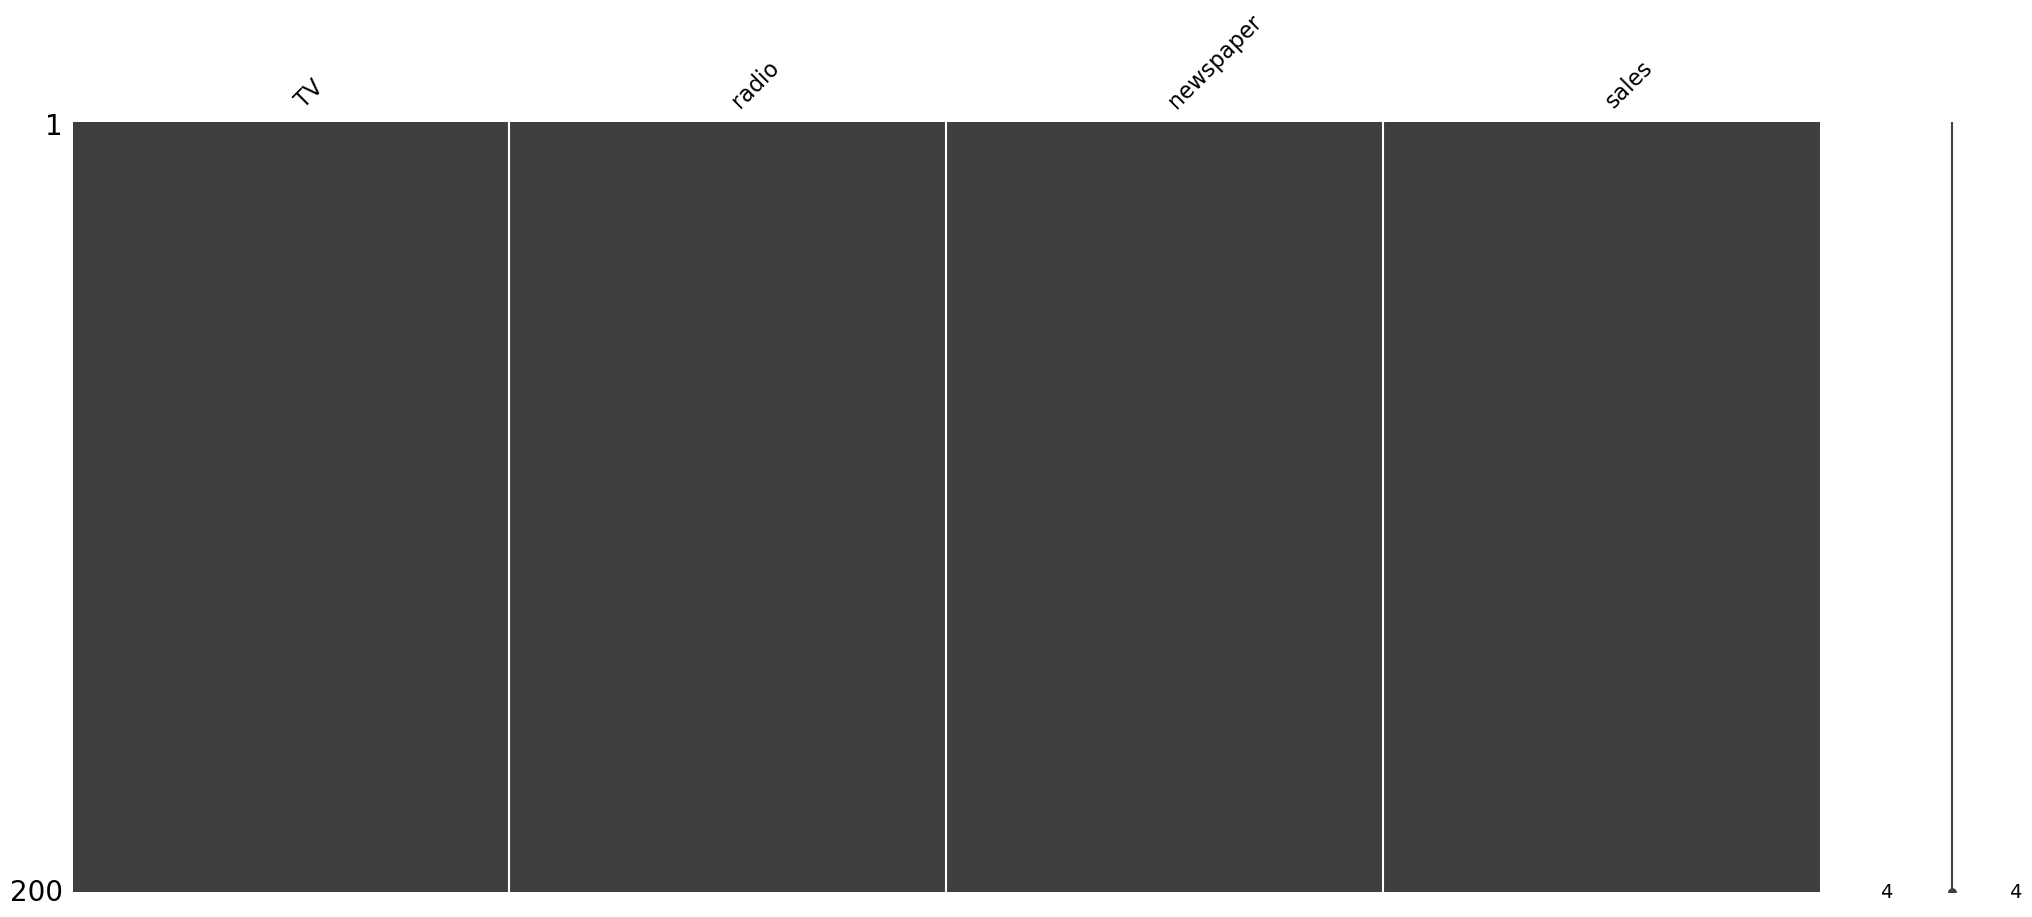

In [11]:
msno.matrix(df)

In [13]:
# örnek null hucreleri olan bir resim (farklı bir data setinden alınmıştır)

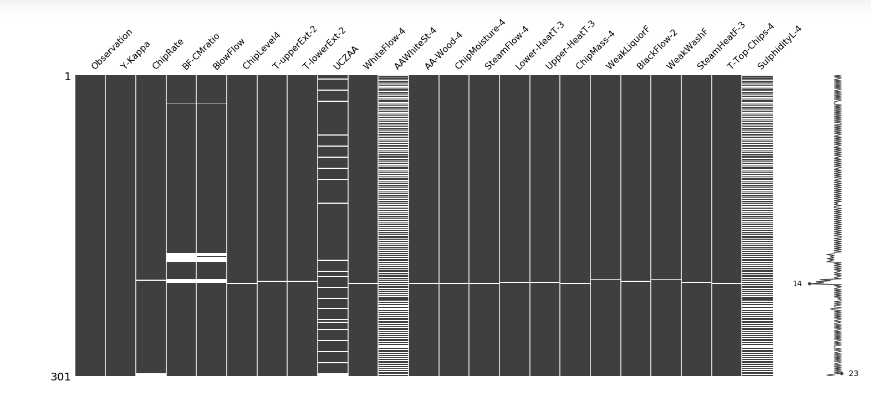

In [14]:
df.sort_values(by="sales", ascending=False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [13]:
df.sort_values(by="sales")

,TV,radio,newspaper,sales
130,0.7,39.6,8.7,1.6
155,4.1,11.6,5.7,3.2
8,8.6,2.1,1.0,4.8
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
...,...,...,...,...
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
198,283.6,42.0,66.2,25.5
183,287.6,43.0,71.8,26.2


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [28]:
!pip install summarytools

In [32]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TV[float64],Mean (sd) : 147.0 (85.9)min < med < max:0.7 < 149.8 < 296.4IQR (CV) : 144.4 (1.7),190 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoUlEQVR4nO3cTY6iQBiA4a+G1qAmEGOiOy8wySxceog57BxhFp7AG7gzMQQj3UQEZjW7bn+qQOurfp91Q2N4Q9cPtmnbVgDf/Xj1BQD3eLv1A8aYkYgMLc9/btv2w/JYWAj1fl0N1Rgzms1mv5Mkmdqc/Hg8ZsaYP75++NCEfL9uPVGHSZJM1+v1R5qm5SMnzvM83mw208PhMBQR7z54oIK9Xzf/9IuIpGlazufzd4vzjyyOgaMQ7xeTKahAqFCBUKECoUIFQoUKhAoVCBUq3LWOiudx3AJNmqYZdHk9viBUj7hugVZVFdd1/bMsy78iYrPg7y2vQw31BYsrrLdARUR2u910u92OL5dL1MfFvZK3oYb8gsUttlugWZZ5uwXqyttQJeAXLPA4n0MVkTBfsPBVXdcDEUmMMban6G245X2oeI6iKAZVVf1aLpdRFEUPj49F+h1uEeoXvttE7nw+v8VxPF6tVuViscgePb7v4RahfuI7T+Qmk4ntUEukx+EWoX6OiZxngg3VcWKQNE0zSNM0YyLnhyBDdZ0YhLzDo1WQobpODFx3eBye5sHu1bsKMtT/bCcGLjs8Lk9znuRfCzrUV3B5moe8V++KUHti8zTXvlfvOIG9uvZMqOiE6wT21tozoaITLkOee9aeew21i7XMji8JPXPY2bo67OktVNYy0aXeQn31WibC0vsY9RVrmQgPX5eGCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChXu+tfoeZ7Hj574dDrFIiJFUcT7/X78zOO1/m6t1+16/D19/QMrB7y1WUnQAQAAAABJRU5ErkJggg=="">",0(0.0%)
2,radio[float64],Mean (sd) : 23.3 (14.8)min < med < max:0.0 < 22.9 < 49.6IQR (CV) : 26.5 (1.6),167 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsElEQVR4nO3cPW/aQBjA8ecggHmRLYQKG0vHSh088iH6YfsRMvAJMmTpxIaELBBuEMZ2l6ZLWsB3vsSP+//N8YtO/8R3p1NMWZYCNF3no18AuMfDrR8wxgxFpG95/3NZli+W1wJ/XA3VGDOczWbfwjCc2tz8cDgkxpjvxApXt/6i9sMwnK5Wq5coik5Vbrzf74P1ej3d7XZ9ESFUOLn56RcRiaLoNJ/Pf1rcf2hxDfAGiymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQoW7DqWgGs7w1o9Qa8YZXj8ItX6c4fWAUD3hDG+9Gh0qc73qHMesIyKFw+O9jXljQ2WuV53LmOV53kvT9PNkMvnR6XQym+f7HPPGhirM9WxYj9lms5k+PT19iuP4ebFYJFUf7HvMvYaa53lPREJjjM3lYVEUvSiKEuZ61djMj5MkGYqIjMdj27m1iMcx9xZqmqa9LMu+LpfLbrfbrfTbLSKSZVmQ5/mX0+n0KCK2A4eW8Bbq+Xx+CIJgFMfxyeZT8vtTNLpcLl0f7wddvM9RbT8lr58iQKTZi6kP5bDNExZF0av7ff53hPoXLts8zK39aG2orjsOk8lkvlqtDpbbPMyta9bKUOvacRgMBo+22zyoVytDZcehfVoZ6it2HNqDE/5QodV/UfG+HBewV09eESpq4bqAvXXyilAbpo6DPDW/0l1cFrD3nLwi1AZpw0Eeh9NXVxewhNogbKv9G6E2ENtqb7E9BRUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlS4639P7ff7oOqNj8djICKSpmmw3W5H73m91mdrfW/X6+/p6xfCCaHWusjxaAAAAABJRU5ErkJggg=="">",0(0.0%)
3,newspaper[float64],Mean (sd) : 30.6 (21.8)min < med < max:0.3 < 25.8 < 114.0IQR (CV) : 32.4 (1.4),172 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACY0lEQVR4nO3cPY7aQBiA4W/MgsyCbCEi6GjSp6DkEDlsroDELXIBJGtlxMQI5DhNiCItC3jGTuYbvU+9YyhemZ0f2zRNI0Dokv/9BYBnvDz6A2PMWERGjtc/N01TOY4F/rgbqjFmPJ/Pv2ZZNnO5+OFweDPGfCNW+Hp0Rx1lWTbbbDZVnuenNhcuyzLd7XazoihGIkKo8PLwp19EJM/z02Kx+OFw/bHDGOAdJlNQgVChAqFCBUKFCoQKFZ6a9buq63ooIpkxxvUSbBhARHoM1Vo7vFwuX1ar1WAwGLRag71iwwBXvYV6Pp9f0jR9Xa/Xp+Vy+dZ2PBsG+FuvP/0iIpPJxHWzQIQNA/zGZAoqECpUIFSoQKhQoffJlA/PdVjWYCMSbKi+67CswcYl2FB91mFZg41PsKFeeazDsgYbESZTUIFQoQKhQoXg/0d1xRHDuEQZKkcM4xNlqBwxjE+UoV5xxDAeTKagAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoULUO1M+eF4rLIR6A89rhYdQb+B5rfAQ6h08rxUOJlNQgVChAqFCBUKFCoQKFQgVKhAqVCBUqMCCfw84J9A9Qu0Y5wT6Qagd45xAPwi1J5wT6BaTKajAHTUwvIXwNkINCG8h/BihBoS3EH6MUAPEWwjfYzIFFQgVKhAqVCBUqECoUIFQoQLLU5GJ9YghoUYk5iOGhBoR3yOG2+12URTFJ2PMwfErJCLy03Hs3bv5U6GWZZm2/dTj8ZiKiFhr0/1+//ovx2v97K6+t4uqqrzuxnVdD621n6fT6fckSS5txz+6m/8CVzmUDQaXxEgAAAAASUVORK5CYII="">",0(0.0%)
4,sales[float64],Mean (sd) : 14.0 (5.2)min < med < max:1.6 < 12.9 < 27.0IQR (CV) : 7.0 (2.7),121 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2F

In [18]:
# mean ve std değerlerinin birbirine yakınlığının Outlier tespitindeki önemini //
# // bir örnek ile değerlendirelim   (NB akışına bir parantez açalım)

print ( np.mean([100,110,120,115]))
print ( np.std([100,110,120,115]))

111.25
7.39509972887452


<Axes: >

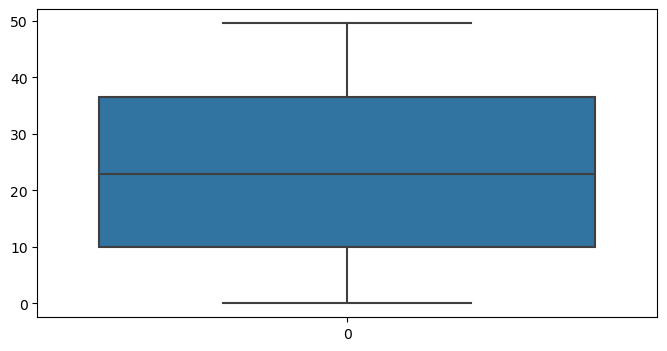

In [34]:
sns.boxplot(data=df['radio'])

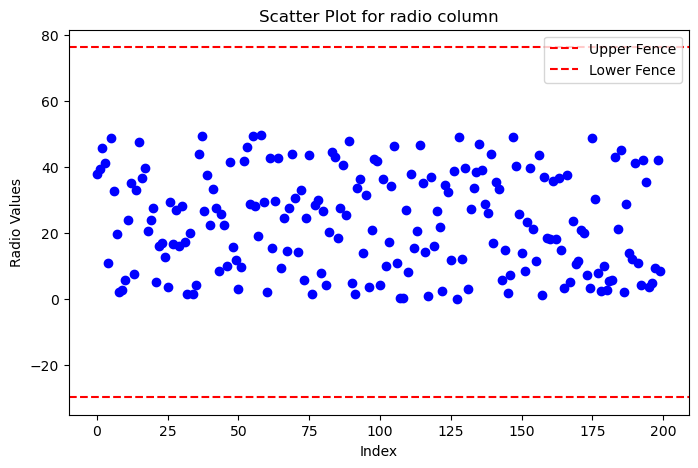

In [36]:
plt.figure(figsize=(8, 5))
plt.scatter(df.index, df['radio'], color='blue')
plt.axhline(y=df['radio'].quantile(0.75) + 1.5 * (df['radio'].quantile(0.75) - df['radio'].quantile(0.25)), color='red', linestyle='--', label='Upper Fence')
plt.axhline(y=df['radio'].quantile(0.25) - 1.5 * (df['radio'].quantile(0.75) - df['radio'].quantile(0.25)), color='red', linestyle='--', label='Lower Fence')
plt.title('Scatter Plot for radio column')
plt.xlabel('Index')
plt.ylabel('Radio Values')
plt.legend()
plt.show()

In [19]:
print ( np.mean([100,110,120,700]))
print ( np.std([100,110,120,700]))

257.5
255.57533136044253


In [20]:
print ( np.mean([100,110,120,900]))
print ( np.std([100,110,120,900]))

307.5
342.153109002388


In [21]:
# Tekrar NB akışına devam ediyoruz

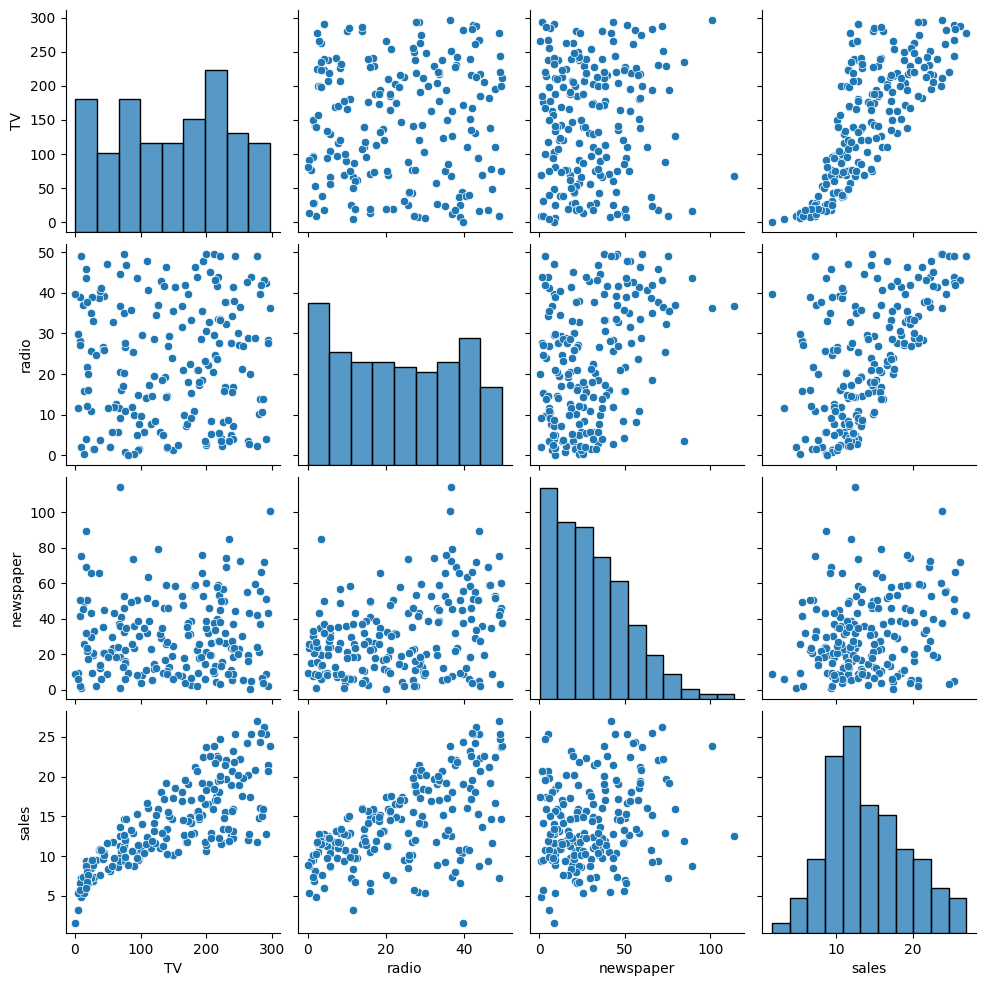

In [22]:
sns.pairplot(df);

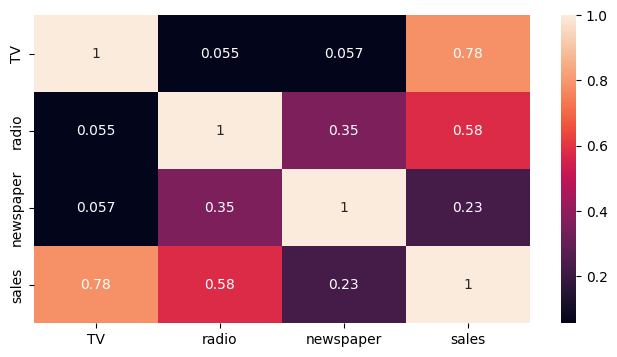

In [23]:
sns.heatmap(df.corr(), annot= True);

In [24]:
from scipy.stats import skew

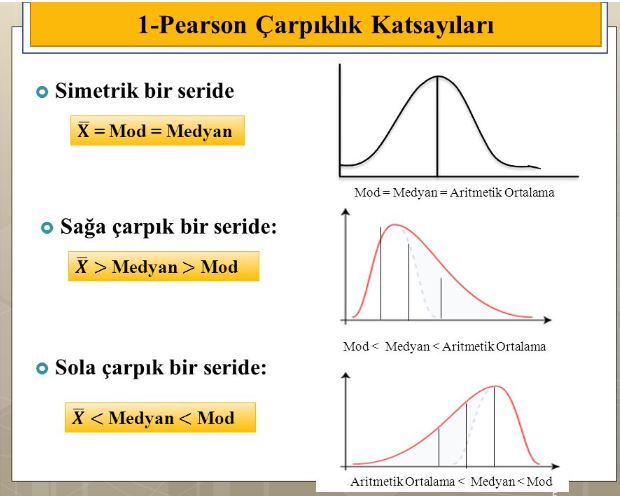

In [25]:
# skewness tespiti için bir döngü
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

# sales sütunu haricindeki tüm feature ların skewness degerini hesplar

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


-0.5 ile + 0.5 arasındaki skewness degerlerinde dagılımın kabaca simetrik oldugu kabul edilebilir

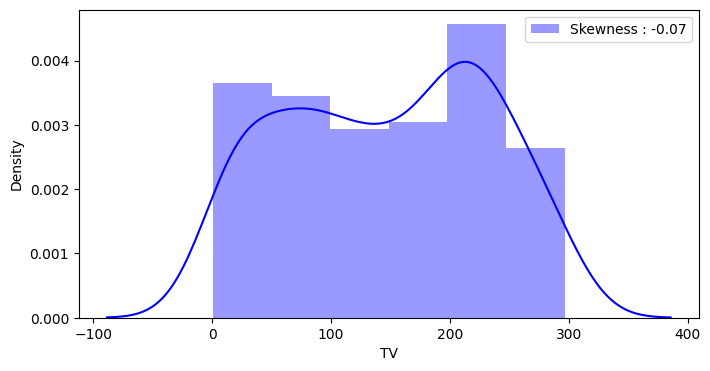

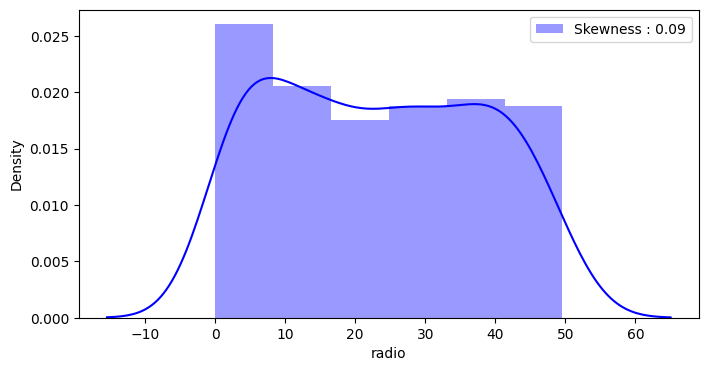

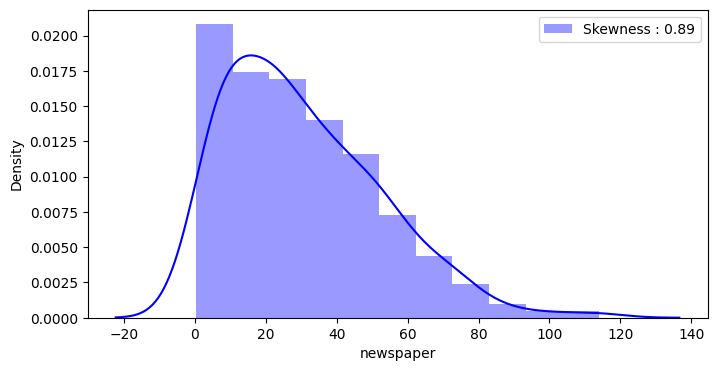

In [26]:
for j in df.drop(columns = "sales").columns:     #"sales" sütunu dataframe'den kaldırılıyor
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))   #  j sütununa ait veri dağılımı grafiği çiziliyor. grafiğin üzerinde gösterilen etiketi oluşturur. Etiket, o sütunun çarpıklık değerini (skewness) içerir
    g = g.legend(loc= "best")   #  grafiğin üzerine eklenen etiketin konumunu en iyi yere yerleştirmes
    plt.show()

In [27]:
df.corr()   # correlation a bakalım

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [38]:
!pip install ydata-profiling

     ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
     ------- ----------------------------- 30.7/149.4 kB 640.0 kB/s eta 0:00:01
     ------------------------------------ - 143.4/149.4 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 149.4/149.4 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/390.6 kB ? eta -:--:--
   ------------------------- -------------- 245.8/390.6 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 390.6/390.6 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   --------------------------------------- 296.5/296.5 kB 17.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/667.1 kB ? eta -:--:--
   ----------------------------- --------- 512.0/667.1 kB 16.2 MB/s eta 0:00:01
   ---------------------------------------- 667.1/66

In [40]:
# load the ydata_profiling package
from ydata_profiling import ProfileReport

In [42]:
# use ProfileReport
pr_df = ProfileReport(df)

In [44]:
# show pr_df
pr_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Train-Test Split

In [32]:
# ML için kullanılan kütüphane Scikit-Learn kütüphanesidir

# !pip install scikit-learn 
# !pip install sklearn

In [48]:
X = df.drop(columns="sales")   # df[["TV", "radio", "newspaper"]] , Indep.variable'lar X e atandı
y = df["sales"]                # modelimin önüne hedef olarak target variable mı atadım.

print(X,y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [50]:
#Veri setinizi randomly olarak eğitim (training) ve test (testing) alt kümelerine ayırmak için kullanılır.

from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

X_train: Eğitim veri setinin özelliklerini (features) içerir.

X_test: Test veri setinin özelliklerini (features) içerir.

y_train: Eğitim veri setinin etiketlerini (labels/targets) içerir.

y_test: Test veri setinin etiketlerini (labels/targets) içerir.

train_test_split(X, y, test_size=0.3, random_state=42): Bu fonksiyon çağrısı ile X (özellikler) ve y (etiketler) veri setleri rastgele olarak eğitim ve test alt kümelerine ayrılır.

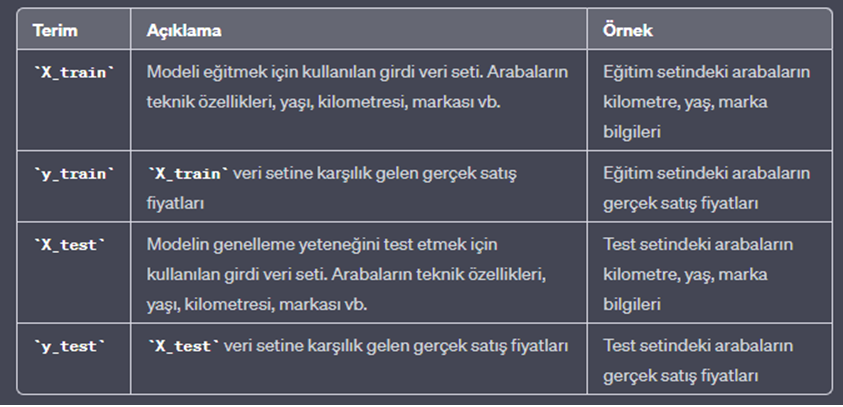

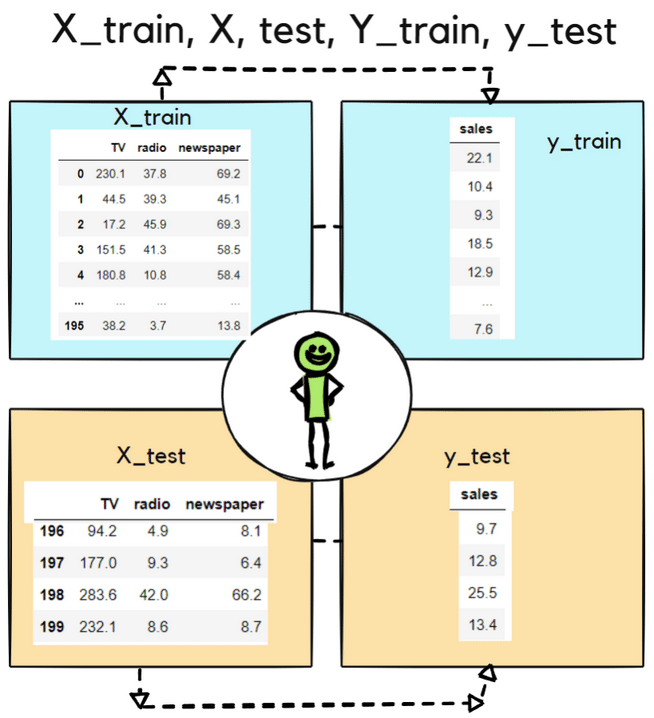

In [54]:
df.sample(15)

,TV,radio,newspaper,sales
75,16.9,43.7,89.4,8.7
169,284.3,10.6,6.4,15.0
40,202.5,22.3,31.6,16.6
196,94.2,4.9,8.1,9.7
131,265.2,2.9,43.0,12.7
172,19.6,20.1,17.0,7.6
48,227.2,15.8,49.9,14.8
77,120.5,28.5,14.2,14.2
31,112.9,17.4,38.6,11.9
183,287.6,43.0,71.8,26.2


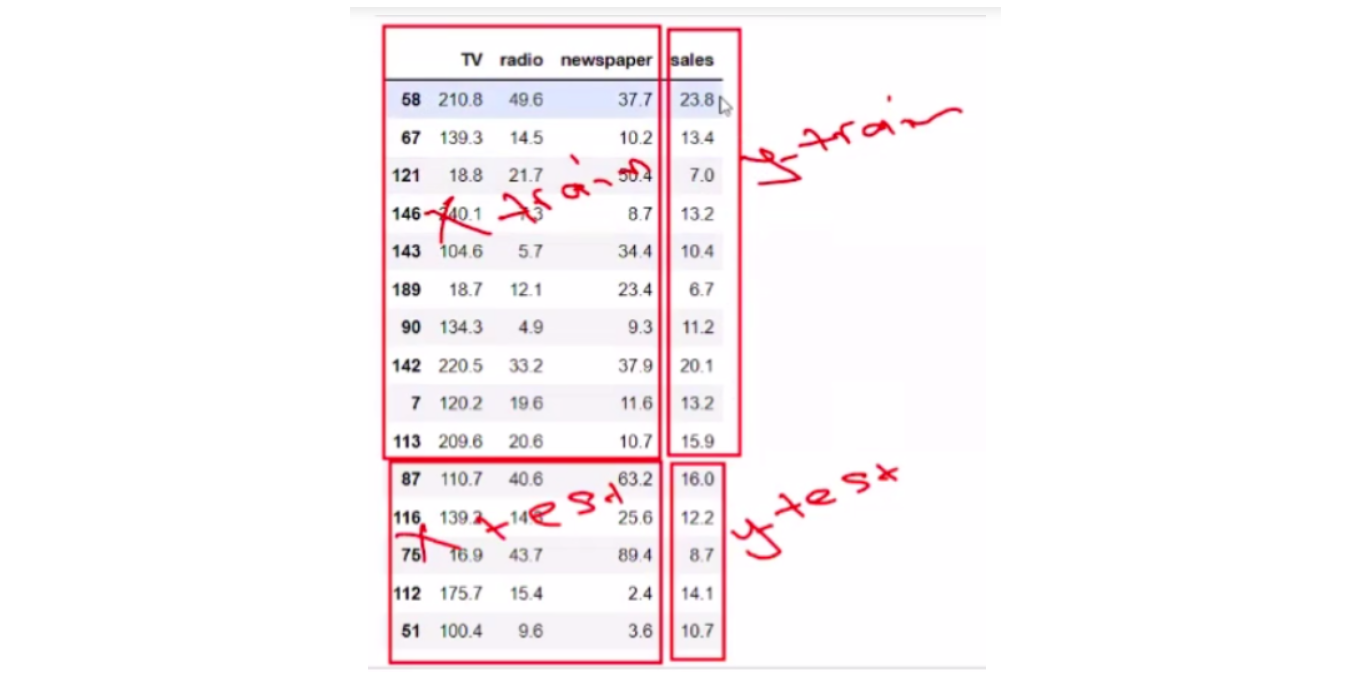

In [56]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

# train ve test setelrinin shape'lerine bakalım

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)


In [38]:
#Print("Train features shape: ", X_train.shape)
#Print("Train target shape: ", y_train.shape)
#Print("Test features shape: ", X_test.shape)
#Print("Test target shape: ", y_test.shape)

In [58]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [60]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [62]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [64]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: sales, dtype: float64

# Model Fitting and Compare Actual and Predicted Labels

In [66]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression()

# Algoritmayı her zaman bir variable'a atayacağız. Çünkü aksi halde prediction kısmında iken hata alınaibliyor

In [70]:
model.fit(X_train,y_train)

LinearRegression()

In [72]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [74]:
model.coef_     # modelin katsayılarını verir  (TV:0.04, radio:0.199, newsp:0.006)

array([0.04405928, 0.1992875 , 0.00688245])

In [76]:
model.feature_names_in_      # yukardaki katsayıların sıryla hangi featurer'lara ait olduğunu bildirir

array(['TV', 'radio', 'newspaper'], dtype=object)

In [78]:
model.intercept_     # modeldeki sabit sayıyı verir

2.70894909251591

y_pred = b1 * TV + b2 * radio + b3 * newspaper + b0

(b1:0.04, b2:0.199, b3:0.006)   
b0: 2.71

In [80]:
# herhangi bir satırdaki degerler için tahmin yapalım..manuel olarak y_pred hesaplayalım
# bu deger y_test kumesindeki 95.satır degeri olan 16.9 gerçek degerinin manuel olarak tahmin edilen halidir

sum(X_test.loc[95]*model.coef_) + model.intercept_

16.565396297434837

In [82]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual":y_test - y_pred}

# actual:gerçek deger,   pred: tahmin edilen deger,   residual: gerçek deger - predicted value

In [84]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [88]:
result_sample = comparing.head(25)
result_sample

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


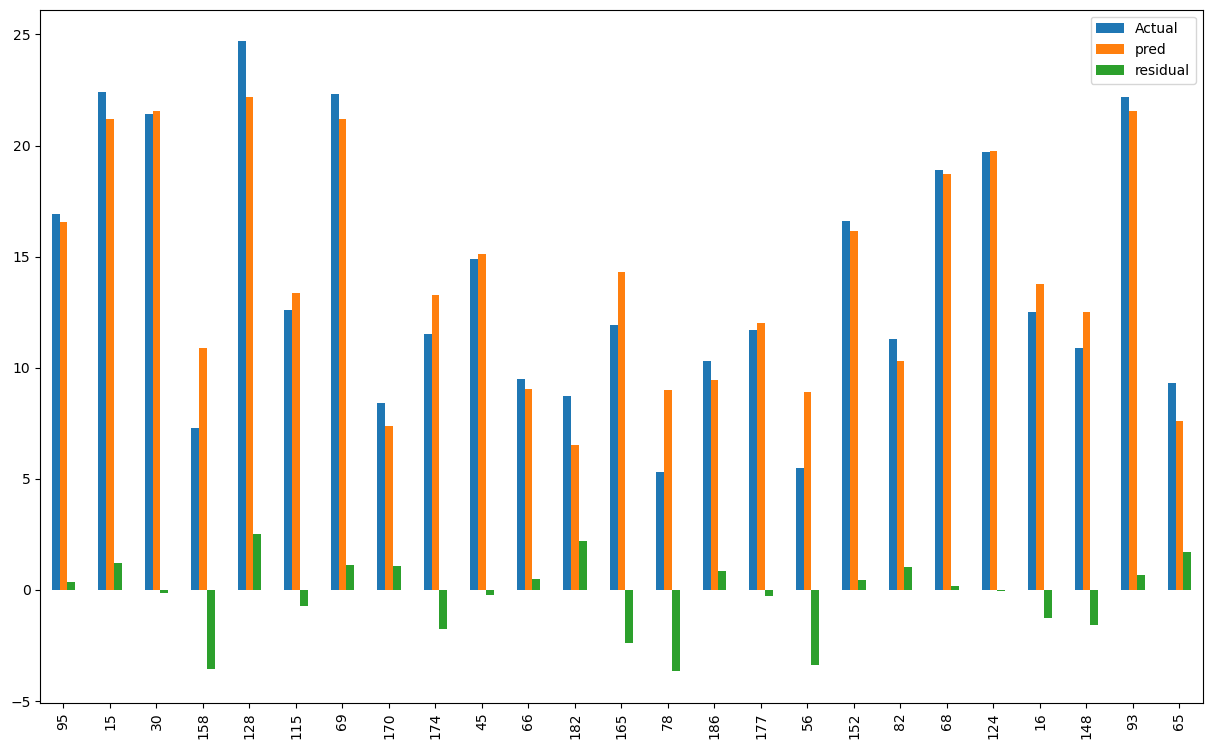

In [90]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

# Error Metrics

In [55]:
# modelin başarısını ölçelim

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# performans değerlendirmesi için kullanacağımız error metricleri
# RMSE metriğini manuel hesaplayacağız ( MSE nin karekökü olarak)

In [138]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8609466508230368

In [140]:
# MAE hesabı  (Sıfıra yakın olması istenir)
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549084

In [142]:
# Mean squared error hesabı
mse = mean_squared_error(y_test, y_pred)
mse

3.79679723671522

In [144]:
# Root Mean Squared Error - RMSE  hesabı  (Sıfıra yakın olması istenir)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446387

In [146]:
# Ortalama Hata Oranı  

# RMSE gibi hataların normalize edilmiş halidir. Bu sayede farklı modellerin birbiriyle karşılaştırması mümkün olmaktadır

In [148]:
sales_mean = df["sales"].mean()
sales_mean

14.0225

In [150]:
# MAE Hata Oranı - "0' a yakın olması iyi bir tahmin modeli oldugunu gösterir"
mae / sales_mean

0.10780311802138764

In [152]:
# RMSE Hata Oranı   (Normalized RMSE)
rmse / sales_mean

0.138957903679418

# Adjusted R2 Score (düzeltilmiş R2 degeri)


n = gözlem sayım (data noktası sayısı) 
p = feature

Adjusted R2 = 1 - [(1 - R2) * (n - 1) / (n - p - 1)]

In [156]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred) # gerçek değerler (y_test) ve tahmin edilen değerler (y_pred) arasındaki R2   skorunu hesaplamaktadır.
    n = df.shape[0]   # number of observations gözlem - veri çerçevesindeki gözlem (satır) sayısını n değişkenine atar.
    p = df.shape[1]-1 # number of independent variables feature - veri çerçevesindeki bağımsız değişken (özellik) sayısını p değişkenine atar. -1 yapma nedeni, genellikle hedef değişkenin de bu veri çerçevesinde olabileceği varsayımıdır.
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)  # Bu satır, düzeltilmiş R2 formülünü kullanarak adj_r2 değerini hesaplar.
    return adj_r2

In [158]:
adj_r2(y_test, y_pred, df)

0.8588182832335934

In [160]:
# önceki r2 degerine yakın çıktı. çünkü zaten 3 feature vardı. alt örnekte feature sayısını abartıı vererek adjusted etkisini görelim

In [162]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = 100 # number of independent variables ..feature sayısıı 100 aldık
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [164]:
adj_r2(y_test, y_pred, df)

0.7204887223614578

In [166]:
# bir görüşe göre, her eklenen feature ,için 10-15 gözlem satırı daha eklenmelidir

# Evaluation Model

In [169]:
# modelin genel degerlendirilmesini bu etapta yapacagız

In [171]:
# Error metricleri hesaplayan ve yazan kod blogu

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [173]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549084
MSE 		: 3.79679723671522
RMSE 		: 1.9485372043446387


In [175]:
# Overfitting kontrolü için train data daki R2 yi bulalım ve yukardak test R2 (0.86) ile karşılaştıralım

In [177]:
# X_train degerlerini prediction yapacağız
y_train_pred = model.predict(X_train)

In [179]:
eval_metric(y_train,y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.158150294807253
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


In [181]:
# Train R2 si ile Test r' si birbirine oldukça yakın. İlk izlenim olaraqk overfiştting yok denilebiir //
# // ancak aşağıdaki işlemlere de bakarak nihai karar verilir

### Residuals Plotting

In [78]:
# Bakılacak adımlardan birisi de Residual'ların nasıl dağıldırğıdır ...

In [126]:
residuals = y_test - y_pred

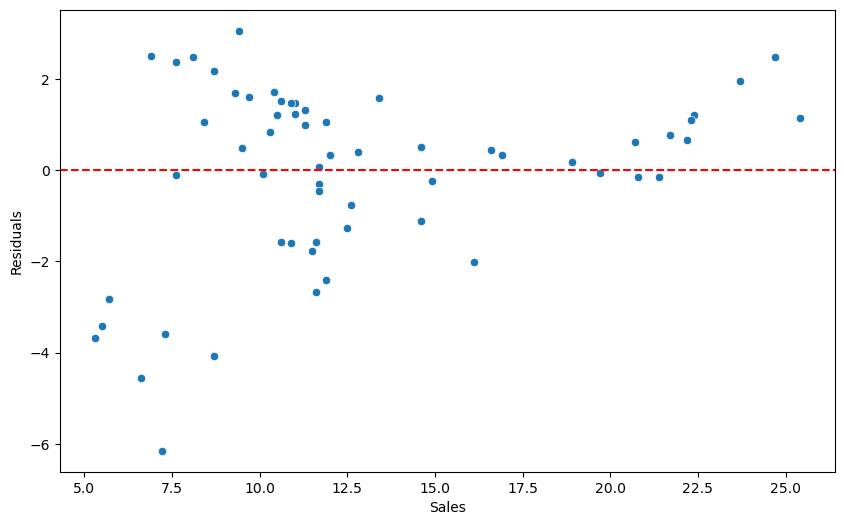

In [128]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x= y_test, y=residuals)
plt.xlabel("Sales")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle ="--" )
plt.show()

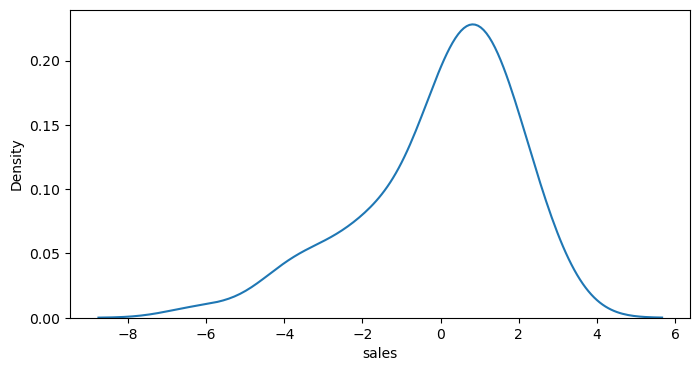

In [184]:
sns.kdeplot(residuals);

Q-Q grafiği ile ayrıca bir bakış daha sergileyelim:  (Residualllar arasındaki ıuyumu kontrol etmek için kullanılır

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([-6.15360735, -4.5531472 , -4.07770578, -3.67026042, -3.58923816,
         -3.41549403, -2.81412012, -

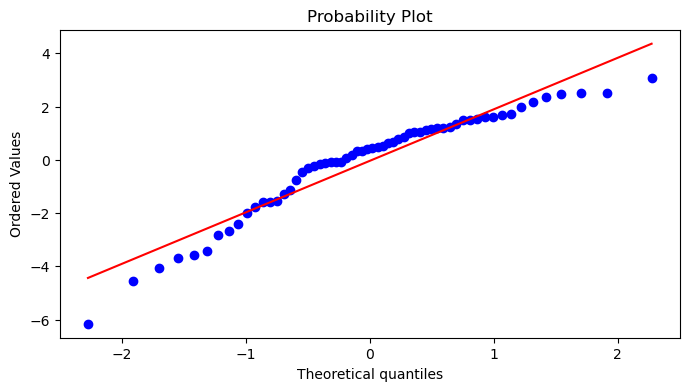

In [186]:
stats.probplot(residuals, dist = "norm", plot = plt)

Grafiğin yorumu: Eğer noktalar doğru üzerinde düzenl biçimde yer alıyorsa bu veriş setinin normal dağıldığı söyleneiblir. 

In [190]:
from scipy.stats import skew

In [192]:
skew(residuals)

-0.9865673346742742

Tabachnik ve Fidel Skewnnes için -+ 1,5 aralığının normal dağılım olarak kabul edilebileceğini söylüyor. burada da 0.98 çıkmış Resiadıals için skewness. 


In [202]:
!pip install yellowbrick # yellowbrick import ediyoruz

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 660.6 kB/s eta 0:00:01
   ----------------- ---------------------- 122.9/282.6 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  276.5/282.6 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.7 MB/s eta 0:00:00


In [204]:
from yellowbrick.regressor import ResidualsPlot

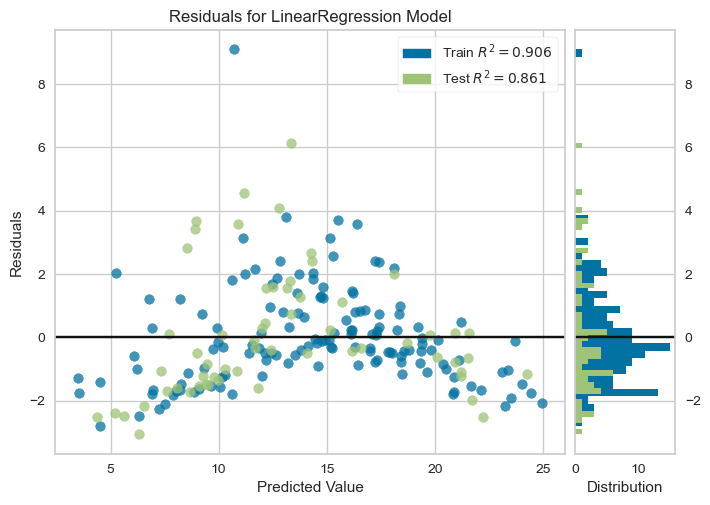

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [206]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Overfitting kontrolü için 2. önemli adım: Prediction Error

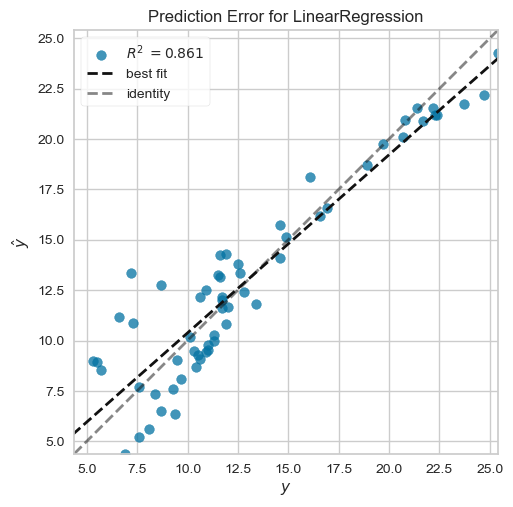

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [208]:
from yellowbrick.regressor import PredictionError
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Final Model

In [210]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [212]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [214]:
final_model.intercept_

2.9388893694594067

In [216]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

# Katsayıları bir data frame içinde görelim

In [218]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [220]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [94]:
#Ornek bir veri girişi ile model denemesi
adv = [[150,20,15]]

In [95]:
final_model.predict(adv)

array([13.55862413])

In [96]:
# ustteki tahmin  sonucunun manuel olarak kontrolu
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_  # yeni datanın değerini manuel olarak sağlamasını yaptık.

13.558624130495996